In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import re
import os
import math

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def add_cost(row):
    np = row['tp'] + row['fn']
    cost = row['fp'] * 1.0 + row['fn'] * 10.0
    #return cost/float(np)
    return cost

def add_f1(row):
    p = row['Precision']
    r = row['Recall']
    if r == 0.0:
        f1 = 0
    else:
        f1 = (2 * p * r)/(p + r)
    return f1

def add_fpr(row):
    nn = row['fp'] + row['tn']
    if nn == 0.0:
        return 0.0
    return row['fp']/nn

def add_tpr(row):
    np = row['tp'] + row['fn']
    if np == 0.0:
        return 0.0
    return row['tp']/np


dirname = os.getcwd()

group_fields = ['ProtocolName', 'GroupValues']
metric = 'ROC_AUC'
#metric = 'f1'
#metric = 'cost'


#file = 'regression_to_classifier_cutoffs_complete_range.csv'
file = 'regression_to_classifier_cutoffs_complete_range_f1_opt.csv'
classification_file = os.path.abspath(os.path.join(dirname, file))
adapt_cutoff_df = pd.read_csv(classification_file)
adapt_cutoff_df.GroupValues.fillna('NA', inplace=True)
#adapt_cutoff_df['f1'] = adapt_cutoff_df.apply(add_f1, axis=1)
adapt_cutoff_df['cost'] = adapt_cutoff_df.apply(add_cost, axis=1)
adapt_cutoff_df['fpr'] = adapt_cutoff_df.apply(add_fpr, axis=1)
adapt_cutoff_df['tpr'] = adapt_cutoff_df.apply(add_tpr, axis=1)
assert (not adapt_cutoff_df.isnull().values.any())
if metric == 'cost':
    best_indices = adapt_cutoff_df.groupby(group_fields)[metric].idxmin()
else:
    best_indices = adapt_cutoff_df.groupby(group_fields)[metric].idxmax()
adapt_cutoff_best_df=adapt_cutoff_df.loc[best_indices]
#adapt_cutoff_best_df.sort_values(group_fields)

In [3]:
adapt_cutoff_df.sort_values(group_fields).columns

Index(['ProtocolName', 'LabelName', 'GroupValues', 'Size', 'Estimator',
       'ROC_AUC', 'ClassificationPointType', 'Direction', 'Threshold',
       'Accuracy', 'Precision', 'Recall', 'f1', 'Percent', 'tp', 'fp', 'tn',
       'fn', 'cost', 'fpr', 'tpr'],
      dtype='object')

In [4]:
adapt_cutoff_best_df.sort_values(group_fields)[['ProtocolName', 'GroupValues', 'ROC_AUC', 'Percent', 'Estimator']]

,ProtocolName,GroupValues,ROC_AUC,Percent,Estimator
1064,5-HT Transporter,NA,0.942740,2.0,Elastic Net on folded fingerprints regression
9809,5-HT1A,NA,0.967681,1.0,Weka RF folded fingerprints regression
1752,5-HT1B,NA,0.975000,0.0,Poly Smile SVM fingerprints regression
12251,5-HT1D,NA,1.000000,0.0,Poly Smile SVM fingerprints regression
5588,5-HT2,NA,0.922277,48.0,Poly Smile SVM fingerprints regression
11904,5-HT2A,NA,0.987421,0.0,Elastic Net on folded fingerprints regression
7338,5-HT2B,NA,0.851960,48.0,RBF Smile SVM descriptors regression
9101,5-HT2C,NA,0.989324,0.0,Tanimoto Smile SVM regression
8401,5-HT3,NA,1.000000,0.0,Tanimoto Smile SVM regression
29,5-HT6,NA,0.978769,4.0,Tanimoto Smile SVM regression


In [21]:
adapt_cutoff_best_df.shape

(344, 21)

In [17]:
set_df = adapt_cutoff_df[(adapt_cutoff_df.ProtocolName == '5-HT1B') & (adapt_cutoff_df.GroupValues == 'NA')]
#set_df = adapt_cutoff_df[(adapt_cutoff_df.ProtocolName == '5-HT2C') & (adapt_cutoff_df.GroupValues == 'NA') \
#                         & (adapt_cutoff_df.Estimator == 'Elastic Net on folded fingerprints regression')]

In [18]:
#set_df

In [19]:
def best_metric_df(metric, maximize=True):
    group_fields = ['Percent']
    if maximize:
        best_indices = set_df.groupby(group_fields)[metric].idxmax()
    else:
        best_indices = set_df.groupby(group_fields)[metric].idxmin()
    best_df=set_df.loc[best_indices]
    return best_df

roc_data = best_metric_df('ROC_AUC', True)
#roc_data
    
    

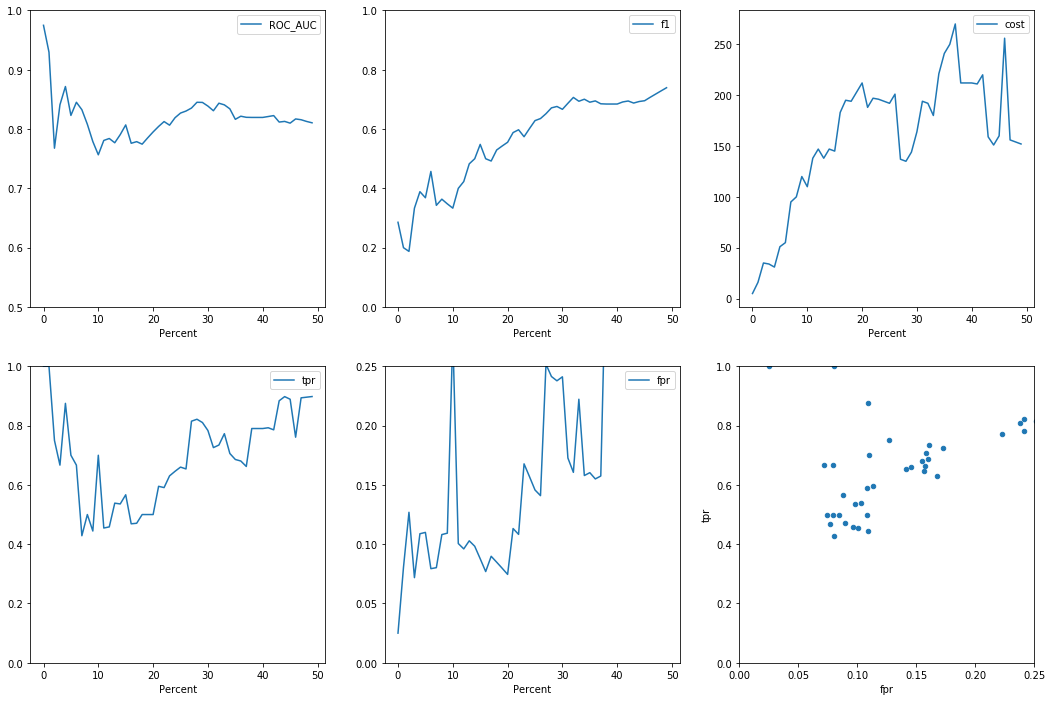

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
roc_data.plot(x='Percent', y='ROC_AUC', ax=axes[0][0], ylim=(0.5, 1))
roc_data.plot(x='Percent', y='f1', ax=axes[0][1], ylim=(0, 1))
roc_data.plot(x='Percent', y='cost', ax=axes[0][2])
roc_data.plot(x='Percent', y='tpr', ax=axes[1][0], ylim=(0, 1))
roc_data.plot(x='Percent', y='fpr', ax=axes[1][1], ylim=(0, 0.25))
roc_data.plot.scatter(x='fpr', y='tpr', ax=axes[1][2], ylim=(0,1), xlim=(0, 0.25))